# Ejercicio 8: Kruskal-Wallis Test

In [1]:
def import_csv(file):
    import pandas as pd
    return pd.read_csv(file)

In [2]:
path = "../Datos/Terminos_lagoon_TA_DIC_2023_RawData.csv"

data_frame = import_csv(path)

In [3]:
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha=0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
    
    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")

In [10]:
 %pip install scikit-posthocs

  Using cached scikit_posthocs-0.11.4-py3-none-any.whl.metadata (5.8 kB)
Using cached scikit_posthocs-0.11.4-py3-none-any.whl (33 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
import scikit_posthocs as sp

def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result

##### Boxplot DIC

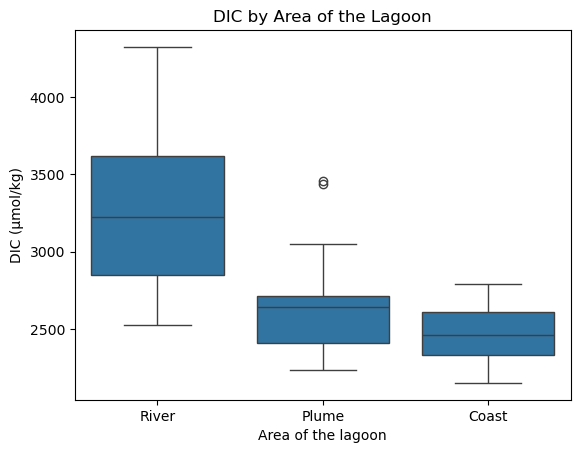

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='dic_micromol_kg', data=data_frame)
plt.xlabel('Area of the lagoon')
plt.ylabel('DIC (μmol/kg)')
plt.title('DIC by Area of the Lagoon')
plt.show()

##### Kruskal-Wallis Test DIC

In [6]:
dic_river = data_frame[data_frame['area'] == 'River']['dic_micromol_kg']
dic_plume = data_frame[data_frame['area'] == 'Plume']['dic_micromol_kg']
dic_coast= data_frame[data_frame['area'] == 'Coast']['dic_micromol_kg']

In [7]:
kruskal_wallis_test(dic_river, dic_plume, dic_coast)

H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
The difference between groups is statistically significant.


In [14]:
dunn_posthoc(data_frame, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


##### Boxplot Temperatura 

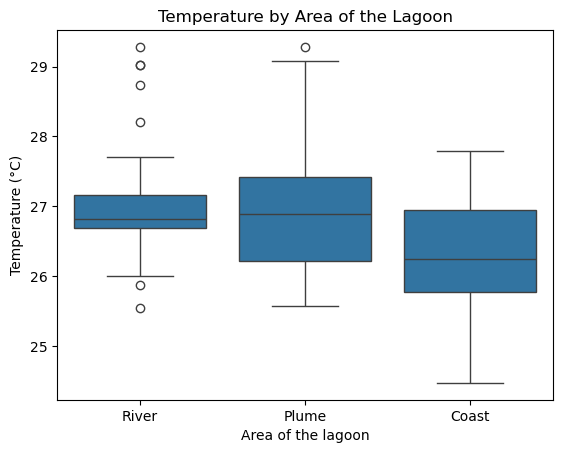

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='temp_c', data=data_frame)
plt.xlabel('Area of the lagoon')
plt.ylabel('Temperature (°C)')
plt.title('Temperature by Area of the Lagoon')
plt.show()

##### Kruskal-Wallis Test Temperatura

In [16]:
temp_river = data_frame[data_frame['area'] == 'River']['temp_c']
temp_plume = data_frame[data_frame['area'] == 'Plume']['temp_c']
temp_coast= data_frame[data_frame['area'] == 'Coast']['temp_c']

In [17]:
kruskal_wallis_test(temp_river, temp_plume, temp_coast)

H statistic = 7.6996429549091365
p-value = 0.021283535690208223
The difference between groups is statistically significant.


In [18]:
dunn_posthoc(data_frame, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00
